In [88]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import json
import requests


class Photo:
    """
    Photo Object that contains simplified data about the Photo, specifically latitude, longitude, and url.
    """

    def __init__ (self,photoID, lat, longi, serverID, farmID, secr):
        self.__latitude = lat
        self.__longitude = longi
        self.__url = "https://farm{}.staticflickr.com/{}/{}_{}.jpg".format(farmID,serverID,photoID,secr)

    def get_latitude(self):
        return self.__latitude

    def get_longitude(self):
        return self.__longitude
    
    def get_url(self):
        return self.__url

class Flickr:
    """
    Provides access to Flickr
    """

    def __init__ (self):
        self.apiKey = "c5ffff1a95a4ab5a9e440d76ad56f247"
        
    def locationServices(self, name):
        url_loc = requests.get('https://api.flickr.com/services/rest/?method=flickr.places.find&api_key='+self.apiKey+'&query='+name+'&format=rest')
        tampa = url_loc.text
        print(tampa)
        soup = BeautifulSoup(tampa, 'html.parser')
        foo = str(soup)
        place_index = (foo.find('place_id'))
        place_id_user = foo[place_index+10:place_index+26]
        return (place_id_user)

    def getDataByLocation(self, place, number=20):
        #get photos id then convert into python list
        photoInfo = []
        ls = locationServices()
        
        #printing out the place of the 
        print (place)
        url1 = "https://api.flickr.com/services/rest/?method=flickr.photos.search&api_key=c5ffff1a95a4ab5a9e440d76ad56f247&place_id="+place+"&per_page=100&page=1&format=json&nojsoncallback=1"
        r = urlopen(url1)
        text = r.read()
        parsed_response = json.loads(text)
        
        return parsed_response

#         for i in range(number):
#             it = parsed_response["photos"]["photo"][i]['id']
#             #print(id)
#             farm = parsed_response["photos"]["photo"][i]['farm']
#             secret = parsed_response["photos"]["photo"][i]['secret']
#             server = parsed_response["photos"]["photo"][i]['server']

#             url2 = 'https://api.flickr.com/services/rest/?method=flickr.photos.geo.getLocation' + \
#             '&api_key=c5ffff1a95a4ab5a9e440d76ad56f247&photo_id='+ it + '&format=json&nojsoncallback=1'
#             r2 = urlopen(url2)
#             text2 = r2.read()
#             parsed_response2 = json.loads(text2)

#             lat = parsed_response2["photo"]["location"]["latitude"]
#             longi = parsed_response2["photo"]["location"]["longitude"]
#             #print (i)

#             photoInfo.append(Photo(it,lat,longi,server,farm,secret))
#         return photoInfo
    
    def getDataByBoundingBox(self,place,lat_box=5,longi_box=5):
        #get photos id then convert into python list
        photoInfo = []
        ls = locationServices()
        
        #printing out the place of the 
        print (place)
        url1 = "https://api.flickr.com/services/rest/?method=flickr.photos.search&api_key=c5ffff1a95a4ab5a9e440d76ad56f247&place_id="+place+"&per_page=100&page=1&format=json&nojsoncallback=1"
        r = urlopen(url1)
        text = r.read()
        parsed_response = json.loads(text)
        
        # check = json.dumps(parsed_response, indent=4, sort_keys=True)
        # print(check)

        for i in range(number):
            it = parsed_response["photos"]["photo"][i]['id']
            #print(id)
            farm = parsed_response["photos"]["photo"][i]['farm']
            secret = parsed_response["photos"]["photo"][i]['secret']
            server = parsed_response["photos"]["photo"][i]['server']

            url2 = 'https://api.flickr.com/services/rest/?method=flickr.photos.geo.getLocation' + \
            '&api_key=c5ffff1a95a4ab5a9e440d76ad56f247&photo_id='+ it + '&format=json&nojsoncallback=1'
            r2 = urlopen(url2)
            text2 = r2.read()
            parsed_response2 = json.loads(text2)

            lat = parsed_response2["photo"]["location"]["latitude"]
            longi = parsed_response2["photo"]["location"]["longitude"]
            #print (i)

            photoInfo.append(Photo(it,lat,longi,server,farm,secret))
        return photoInfo


In [87]:
#utils
def checkIfInBoundingBox(check_lat,check_longi,lat,longi,lat_box=5,longi_box=5):
    """
    Method for checking if a latitude and longitude is within a bounding box with dimensions of [2*longi_box,[2*lat_box]
    
    *Currently not checking for the limits of latitude and longitude*
    
    Args:
        arg1: check_lat (float) latitude of the location that we are checking for the bounding box
        arg2: check_longi (float) longitude of the location that we are checking for the bounding box
        arg3: lat (float) latitude of the center of the bounding box
        arg4: long (float) longitude of the center of the bounding box
        arg5: lat_box (float) latitude width from the center of the bounding box
        arg6: longi_box (float) longitude width from the center of the bounding box
    """
    output = True
    
    if (lat-lat_box)>check_lat || check_lat>(lat+lat_box):
        output=False
        
    if (longi-longi_box)>check_longi || check_longi>(longi+longi_box):
        output=False
    
    return output

SyntaxError: invalid syntax (<ipython-input-87-b14185eafacc>, line 18)

In [89]:
flick = Flickr()
photos = flick.getDataByLocation(place, 20)

.skCPTpTVr.Q3WKW


In [90]:
photos

{'photos': {'page': 1,
  'pages': 1444,
  'perpage': 100,
  'total': '144356',
  'photo': [{'id': '39840513963',
    'owner': '95964271@N00',
    'secret': '0bf743eaec',
    'server': '4842',
    'farm': 5,
    'title': 'USA - New York - 4th January 2019 -949',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '39840512073',
    'owner': '95964271@N00',
    'secret': 'd586bbfbc2',
    'server': '4876',
    'farm': 5,
    'title': 'USA - New York - 4th January 2019 -897',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '39840510533',
    'owner': '95964271@N00',
    'secret': 'e7320234a3',
    'server': '4918',
    'farm': 5,
    'title': 'USA - New York - 4th January 2019 -843',
    'ispublic': 1,
    'isfriend': 0,
    'isfamily': 0},
   {'id': '39840508363',
    'owner': '95964271@N00',
    'secret': 'ca6459b71c',
    'server': '4854',
    'farm': 5,
    'title': 'USA - New York - 4th January 2019 -751',
    'ispublic': 1,
    'isfriend': 0,
    

In [81]:
len(photos)

20

In [2]:
import requests
import shutil
from urllib.request import urlopen
import hashlib

# secret = "1bdc766eee4d312f"
# url1 = "http://api.flickr.com/services/rest/?&method=flickr.photos.getPopular&api_key=c5ffff1a95a4ab5a9e440d76ad56f247&user_id="

# m = hashlib.sha1()
# m.update(secret)
# m.digest()

# def urlconcat(str):
# 	output = url1 + str + "&format=json"
# 	return output

# url3 = urlconcat("47318367%40N08")

# print (url3)

# r = urlopen(url3)

# text = r.read()

# print (text)



url1 = 'https://farm5.staticflickr.com/4526/38306537401_dc945483be_b.jpg'
response = requests.get(url1, stream=True)
with open('38306537401_dc945483be_b.jpg', 'wb') as out_file:
   shutil.copyfileobj(response.raw, out_file)
del response

In [4]:
%ls

38306537401_dc945483be_b.jpg  app.py
Flickr API Test.ipynb         static/
README.md                     templates/


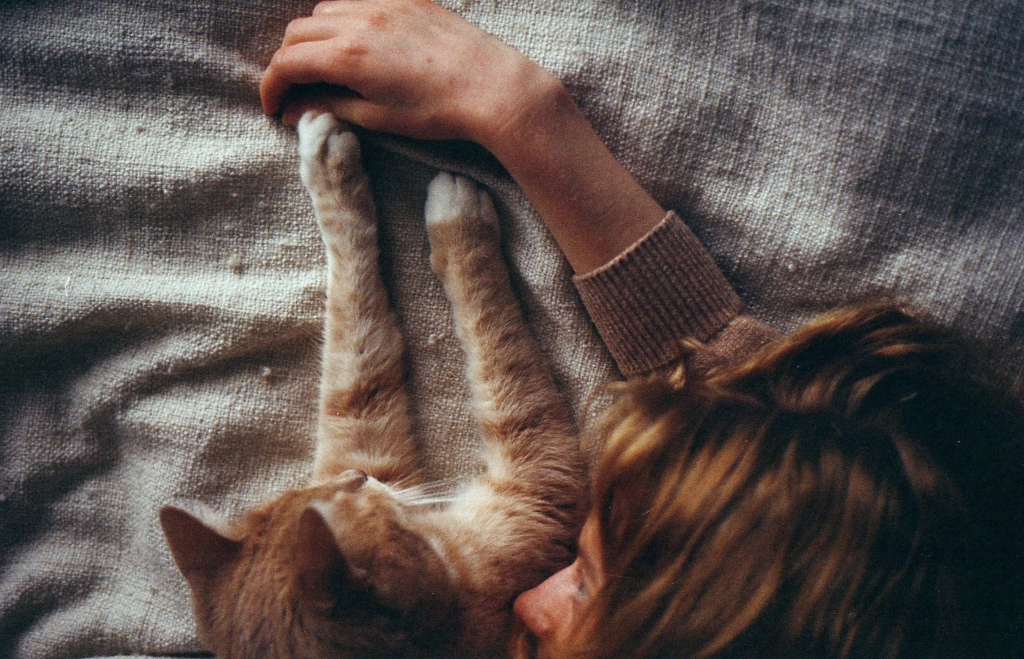

In [5]:
from IPython.display import Image
Image(filename='38306537401_dc945483be_b.jpg') 

In [39]:
clean_cities_list

['New York City',
 'New York',
 'Los Angeles',
 'California',
 'Chicago',
 'Illinois',
 'Houston',
 'Texas',
 'Philadelphia',
 'Pennsylvania',
 'Phoenix, Arizona',
 'Arizona',
 'San Antonio',
 'Texas',
 'San Diego',
 'California',
 'Dallas',
 'Texas',
 'San Jose, California',
 'California',
 'Austin, Texas',
 'Texas',
 'Jacksonville, Florida',
 'Florida',
 'San Francisco',
 'California',
 'Indianapolis',
 'Indiana',
 'Columbus, Ohio',
 'Ohio',
 'Fort Worth, Texas',
 'Texas',
 'Charlotte, North Carolina',
 'North Carolina',
 'Detroit',
 'Michigan',
 'El Paso, Texas',
 'Texas',
 'Seattle',
 'Washington state',
 'Denver',
 'Colorado',
 'Washington, D.C.',
 'Memphis, Tennessee',
 'Tennessee',
 'Boston',
 'Massachusetts',
 'Nashville, Tennessee',
 'Tennessee',
 'Baltimore',
 'Maryland',
 'Oklahoma City',
 'Oklahoma',
 'Portland, Oregon',
 'Oregon',
 'Las Vegas',
 'Nevada',
 'Louisville, Kentucky',
 'Kentucky',
 'Milwaukee',
 'Wisconsin',
 'Albuquerque, New Mexico',
 'New Mexico',
 'Tucson, 

In [40]:
cities_list.rem

[<a href="/wiki/New_York_City" title="New York City">New York</a>,
 <a href="/wiki/New_York" title="New York">New York</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="/wiki/Los_Angeles" title="Los Angeles">Los Angeles</a>,
 <a href="/wiki/California" title="California">California</a>,
 <a href="/wiki/Chicago" title="Chicago">Chicago</a>,
 <a href="/wiki/Illinois" title="Illinois">Illinois</a>,
 <a href="/wiki/Houston" title="Houston">Houston</a>,
 <a href="/wiki/Texas" title="Texas">Texas</a>,
 <a href="/wiki/Philadelphia" title="Philadelphia">Philadelphia</a>,
 <a href="/wiki/Pennsylvania" title="Pennsylvania">Pennsylvania</a>,
 <a href="/wiki/Phoenix,_Arizona" title="Phoenix, Arizona">Phoenix</a>,
 <a href="/wiki/Arizona" title="Arizona">Arizona</a>,
 <a href="/wiki/San_Antonio" title="San Antonio">San Antonio</a>,
 <a href="/wiki/Texas" title="Texas">Texas</a>,
 <a class="mw-redirect" href="/wiki/San_Diego" title="San Diego">San Diego</a>,
 <a href="/wiki/California" title="Californ

In [42]:
import requests
from bs4 import BeautifulSoup
import urllib.request


page = requests.get('https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population')
soup = BeautifulSoup(page.text, 'html.parser')
state = ''
city =  soup.find('table')
cities_list = city.find_all('a')

new_dict = {}
clean_cities_list = []
for i in range(len(cities_list)):
    try:
        clean_cities_list.append(cities_list[i]['title'])
    except:
        print(cities_list[i])
    #state = cities_name['title'][(cities_name['title'].find(',')):]

#new_dict.update({cities_name['title'] : 'test'})
#print (new_dict)
#print (temp__List)


for idx in range (0 , len(clean_cities_list), 2):
    if (idx < len(clean_cities_list)-1):
        new_dict.update({clean_cities_list[idx] : clean_cities_list[idx+1]})
print(new_dict)

<a href="#cite_note-1">[1]</a>
{'New York City': 'New York', 'Los Angeles': 'California', 'Chicago': 'Illinois', 'Houston': 'Texas', 'Philadelphia': 'Pennsylvania', 'Phoenix, Arizona': 'Arizona', 'San Antonio': 'Texas', 'San Diego': 'California', 'Dallas': 'Texas', 'San Jose, California': 'California', 'Austin, Texas': 'Texas', 'Jacksonville, Florida': 'Florida', 'San Francisco': 'California', 'Indianapolis': 'Indiana', 'Columbus, Ohio': 'Ohio', 'Fort Worth, Texas': 'Texas', 'Charlotte, North Carolina': 'North Carolina', 'Detroit': 'Michigan', 'El Paso, Texas': 'Texas', 'Seattle': 'Washington state', 'Denver': 'Colorado', 'Washington, D.C.': 'Memphis, Tennessee', 'Tennessee': 'Evansville, Indiana', 'Massachusetts': 'Ventura, California', 'Maryland': 'Oklahoma City', 'Oklahoma': 'West Palm Beach, Florida', 'Oregon': 'Cambridge, Massachusetts', 'Nevada': 'Scottsdale, Arizona', 'Kentucky': 'Pittsburgh', 'Wisconsin': 'Broken Arrow, Oklahoma', 'New Mexico': 'South Bend, Indiana', 'Arizona':

In [45]:
location = locationServices()

In [50]:
place = location.try_location("New York")

placeeeeeeeeeeeeee
.skCPTpTVr.Q3WKW


In [77]:
photos[0].get_url()

'https://farm5.staticflickr.com/4842/39840513963_0bf743eaec.jpg'